In [1]:
from scipy.optimize import fsolve
from scipy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
def inv_Euler(args):
    Funcs,Yn,h,T_range_n,dim=args
    return fsolve(lambda y1: \
            [y1[i]-(Yn[i]+h*Funcs[i]([y1[j] for j in np.arange(dim)],T_range_n))\
                    for i in np.arange(dim) ] ,[Yn[i] for i in np.arange(dim)] )

def Euler(args):
    Funcs,Yn,h,T_range_n,dim=args
    k1=[Funcs[i]( Yn ,T_range_n) for i in np.arange(dim)]
    return [Yn[i]+k1[i]*h for i in np.arange(dim)]

def RK4(args):
    Funcs,Yn,h,T_range_n,dim=args
    k1=[Funcs[i]( Yn ,T_range_n) for i in np.arange(dim)]
    k2=[Funcs[i](Yn+k1[i]*h/2.,T_range_n+h/2.)for i in np.arange(dim)]
    k3=[Funcs[i](Yn+k2[i]*h/2.,T_range_n+h/2.)for i in np.arange(dim)]
    k4=[Funcs[i](Yn+k3[i]*h,T_range_n+h)for i in np.arange(dim)]
    return [Yn[i]+1/6.*(k1[i]+2*k2[i]+2*k3[i]+k4[i])*h for i in np.arange(dim)]    
 


def N_diff_eq(Funcs,in_C,T_range,method=inv_Euler):
    N=len(T_range) 
    try:
        dim=len(Funcs)
    except:
        dim=1
        Funcs=[Funcs]
        in_C=[in_C]
        
    Y=np.empty([N,dim])
    for i in np.arange(dim):
        Y[0][i]=in_C[i]
    for n in np.arange(N-1):
        h = t_range[n+1]-t_range[n]
        Y[n+1]=method([Funcs,Y[n],h,T_range[n],dim])
    return Y

/home/dimitronic/anaconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<IPython.core.display.Javascript object>


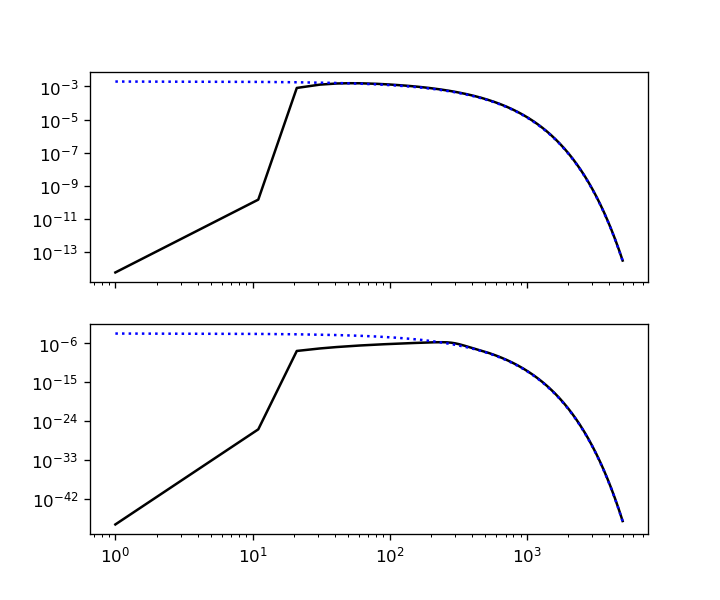

In [4]:
xeq=lambda t: np.exp(-t/200.)/500
yeq=lambda t: np.exp(-t/50.)/5000

def dxdt(r,t):
    x=r[0]
    y=r[1]
    return -(1.e-8*(x**2/xeq(t)**2-y**2/yeq(t)**2)+\
               1.e-4*(x**2/xeq(t)**2-1))

def dydt(r,t):
    x=r[0]
    y=r[1]
    return -(1.e-8*(y**2/yeq(t)**2-x**2/xeq(t)**2)+\
               1.e-20*(y**2/yeq(t)**2-1))

N=500
tmax=5000
t_range=np.linspace(1,tmax,N)

sol_inv=N_diff_eq([dxdt,dydt],[xeq(tmax)/5.,yeq(tmax)/5.],t_range,method=inv_Euler)


fig, ax = plt.subplots(nrows=2, ncols=1,sharex=True,figsize=(6, 5))


ax[0].plot(t_range,sol_inv[:,0],'black')

eq=[xeq(i) for i in t_range]
ax[0].plot(t_range,eq,'b:')



ax[1].plot(t_range,sol_inv[:,1],'black')

eq=[yeq(i) for i in t_range]
ax[1].plot(t_range,eq,'b:')


ax[0].semilogy()
ax[0].semilogx()
ax[1].semilogy()
ax[1].semilogx()

plt.show();

CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 24.5 ms
CPU times: user 76 ms, sys: 8 ms, total: 84 ms
Wall time: 77.9 ms
CPU times: user 444 ms, sys: 8 ms, total: 452 ms
Wall time: 445 ms


<IPython.core.display.Javascript object>


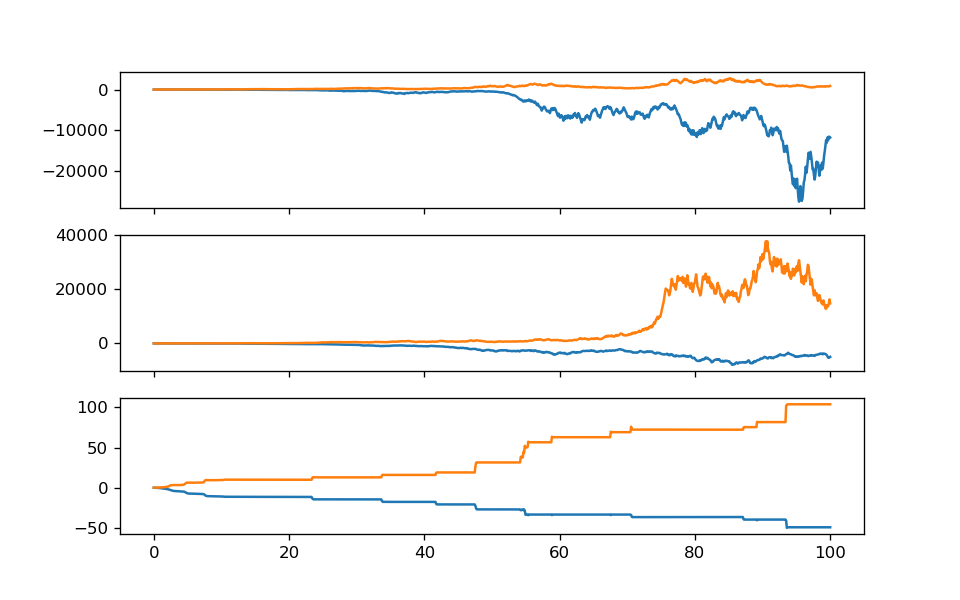

In [13]:
def dxdt(r,t):
    x=r[0]
    y=r[1]
    return np.sin((y+x))*x-t

def dydt(r,t):
    x=r[0]
    y=r[1]
    return np.sin((x-y))*y+t;


N=1000
t_range=np.linspace(0,100,N)
%time R_Euler=N_diff_eq([dxdt,dydt],[0.1,0.2],t_range,Euler)
%time R_RK4=N_diff_eq([dxdt,dydt],[0.1,0.2],t_range,RK4)
%time R_inv=N_diff_eq([dxdt,dydt],[0.1,0.2],t_range,inv_Euler)


fig, ax = plt.subplots(nrows=3, ncols=1,sharex=True,figsize=(8, 5))

ax[0].plot(t_range,R_Euler)
ax[1].plot(t_range,R_RK4)
ax[2].plot(t_range,R_inv)

plt.show();